In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#load the data
data = pd.read_csv("/Users/ankith/Downloads/db.csv")
print (data)

#check null data
print(data.isnull().sum())


#features and target 
features = data[["FS","FU"]]
target = data["Diabetes"]

#handle the data
cfeatures = pd.get_dummies(features,drop_first =True)
print(features)
print(cfeatures)


#train and test
x_train,x_test,y_train,y_test = train_test_split(cfeatures.values,target)

#model
model  = LogisticRegression()
model.fit(x_train,y_train)

#performance
cr = classification_report(y_test,model.predict(x_test))
print(cr)







     FS   FU Diabetes
0    81  YES       NO
1   120   NO       NO
2   150  YES      YES
3    91  YES       NO
4   150   NO      YES
5    78  YES       NO
6    90  YES       NO
7   140  YES      YES
8    91   NO       NO
9   200   NO      YES
10  195  YES      YES
11   70  YES       NO
12   75   NO       NO
13  130  YES      YES
14  125   NO       NO
15   60  YES       NO
16  155   NO      YES
FS          0
FU          0
Diabetes    0
dtype: int64
     FS   FU
0    81  YES
1   120   NO
2   150  YES
3    91  YES
4   150   NO
5    78  YES
6    90  YES
7   140  YES
8    91   NO
9   200   NO
10  195  YES
11   70  YES
12   75   NO
13  130  YES
14  125   NO
15   60  YES
16  155   NO
     FS  FU_YES
0    81    True
1   120   False
2   150    True
3    91    True
4   150   False
5    78    True
6    90    True
7   140    True
8    91   False
9   200   False
10  195    True
11   70    True
12   75   False
13  130    True
14  125   False
15   60    True
16  155   False
              precision    

/var/folders/ln/0t3kfd6n7ynb2c8nh_zw28140000gp/T/ipykernel_6562/212619919.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_binary = y_test.replace({'NO': 0, 'YES': 1})


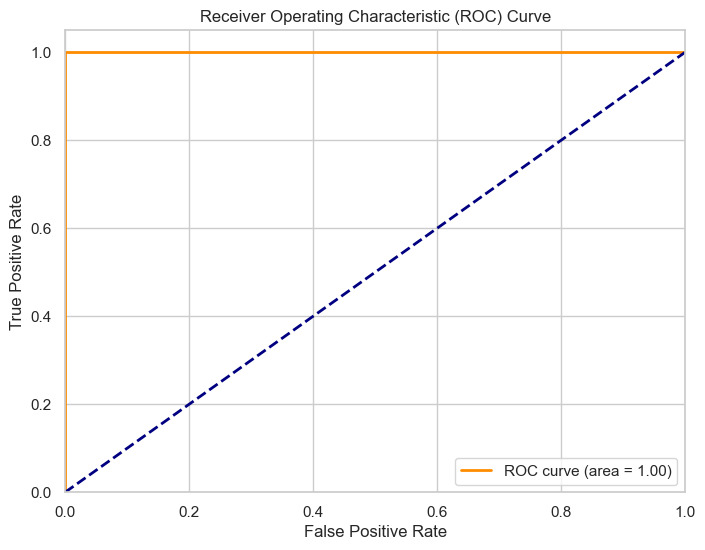

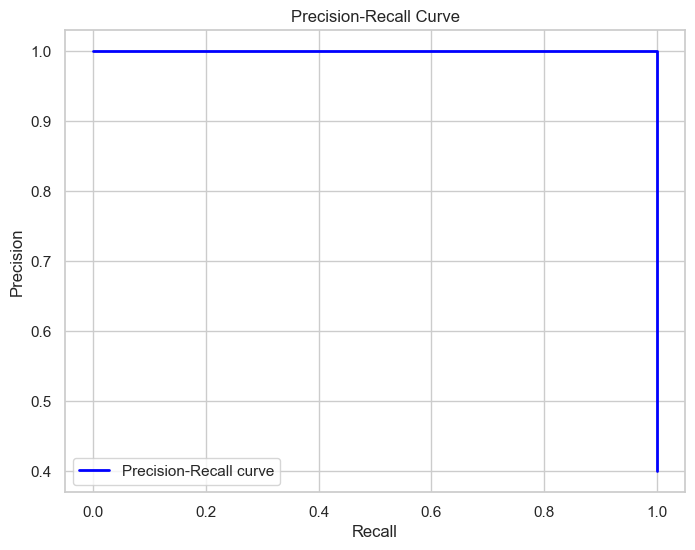

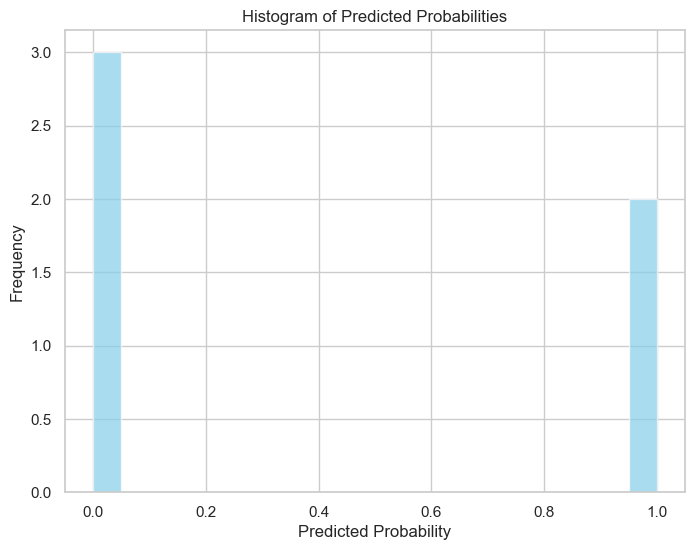

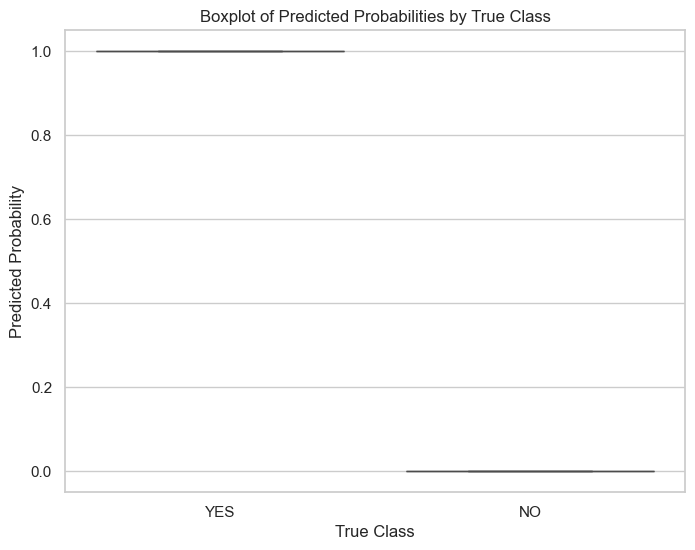

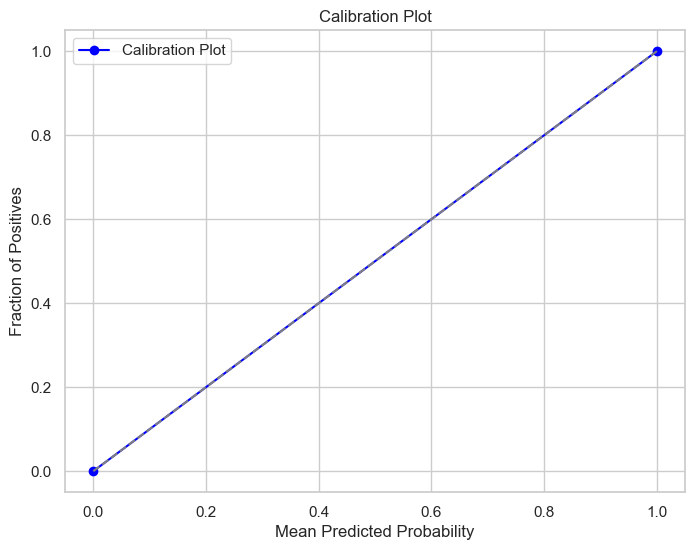

ImportError: cannot import name 'plot_cumulative_gain' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

In [17]:
# Convert target variable to binary format
y_test_binary = y_test.replace({'NO': 0, 'YES': 1})

# ROC Curve
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Histogram of Predicted Probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# Boxplot of Predicted Probabilities by True Class
plt.figure(figsize=(8, 6))
data_boxplot = pd.DataFrame({'Predicted Probability': y_pred_prob, 'True Class': y_test})
sns.boxplot(x='True Class', y='Predicted Probability', data=data_boxplot)
plt.title('Boxplot of Predicted Probabilities by True Class')
plt.show()

# Calibration Plot
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_prob, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', color='blue', label='Calibration Plot')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()

# Cumulative Gains Curve
from sklearn.metrics import plot_cumulative_gain
plt.figure(figsize=(8, 6))
plot_cumulative_gain(model, x_test, y_test_binary)
plt.title('Cumulative Gains Curve')
plt.show()

import matplotlib.pyplot as plt

# Extract features from the dataset
sugar_levels = data['sugar_levels']
freq_urination = data['freq_urination']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sugar_levels, freq_urination, c=target, cmap='viridis', alpha=0.5)
plt.colorbar(label='Diabetes (0: No, 1: Yes)')
plt.xlabel('Testing Sugar Levels')
plt.ylabel('Frequency of Urination')
plt.title('Scatter Plot of Testing Sugar Levels vs. Frequency of Urination')
plt.show()



In [1]:
#import
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pickle import *

#load the data
data = pd.read_csv("/Users/ankith/Downloads/db.csv")

#features and values
features = data[["FS","FU"]]
target = data["Diabetes"]

#handle the data
cfeatures = pd.get_dummies(features,drop_first=True)

#model
model = LogisticRegression()
model.fit(cfeatures.values,target)


#save the model
f = open("dia.pkl","wb")
dump(model,f)
f.close()
print("model created")



model created


In [3]:
from pickle import*
import os

fn = "dia.pkl"
if os.path.exists(fn):
    f = open(fn,"rb")
    model=load(f)
    f.close()
    
    
    fs = float(input("enter fasting sugar"))
    fu = int(input("enter 1 for No and 2 for yes"))
    if fu == 1:
        d = [[fs,0]]
        
    else:
        d=[[fs,1]]
    result = model.predict(d)
    print(result[0])
    
else:
    print(fn, "does not exists")

NO


In [1]:

#load the data89
data = pd.read_csv("/Users/ankith/Downloads/db.csv")
print (data)


NameError: name 'pd' is not defined

In [4]:
sns.set(style='whitegrid')
f , ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.displot(df['charges', kde = True , color = 'c'])
plt.title('Distribution of Charge')

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1450501901.py, line 3)

NameError: name 'df' is not defined

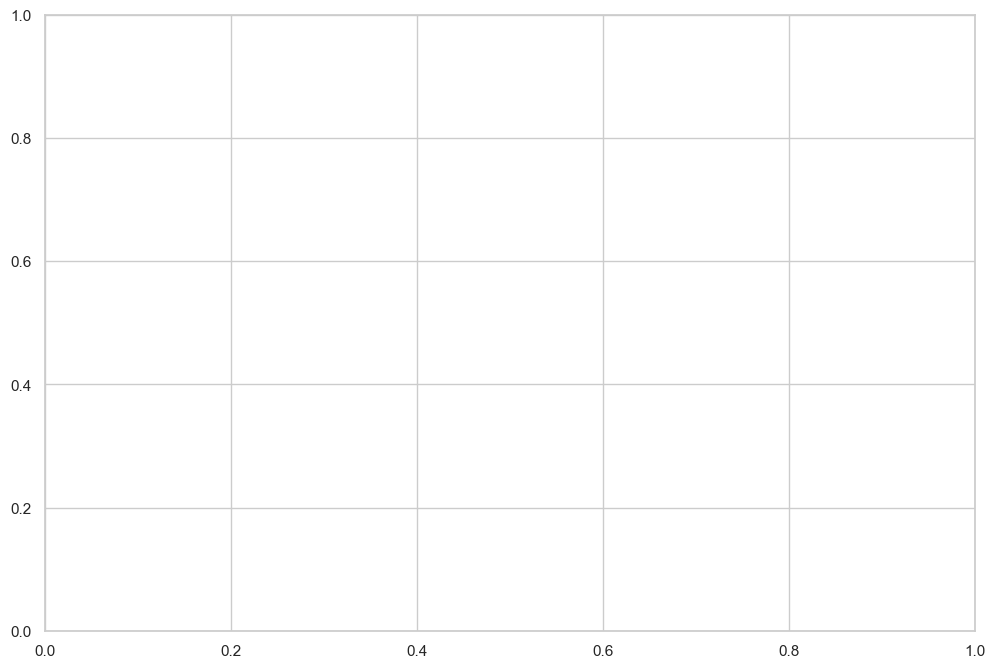

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
f , ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.displot(df['charges'], kde=True, color='c')
plt.title('Distribution of Charges')
plt.show()


NameError: name 'df' is not defined

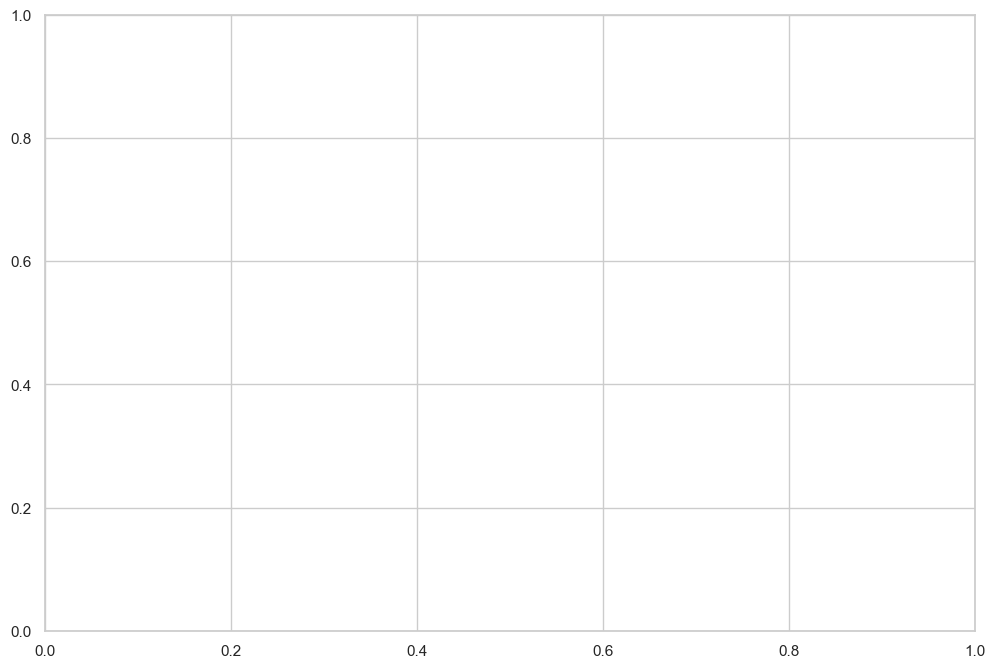

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(df['charges'], kde=True, color='c')
plt.title('Distribution of Charges')
plt.show()




In [15]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


ValueError: y_true takes value in {'NO', 'YES'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

KeyError: 'sugar_levels'

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#load the data
data = pd.read_csv("/Users/ankith/Downloads/db.csv")
print (data)

#check null data
print(data.isnull().sum())


#features and target 
features = data[["FS","FU"]]
target = data["Diabetes"]

#handle the data
cfeatures = pd.get_dummies(features,drop_first =True)
print(features)
print(cfeatures)


#train and test
x_train,x_test,y_train,y_test = train_test_split(cfeatures.values,target)

#model
model  = LogisticRegression()
model.fit(x_train,y_train)

#performance
cr = classification_report(y_test,model.predict(x_test))
print(cr)

import matplotlib.pyplot as plt

# Extract features from the dataset
sugar_levels = data['sugar_levels']
freq_urination = data['freq_urination']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sugar_levels, freq_urination, c=target, cmap='viridis', alpha=0.5)
plt.colorbar(label='Diabetes (0: No, 1: Yes)')
plt.xlabel('Testing Sugar Levels')
plt.ylabel('Frequency of Urination')
plt.title('Scatter Plot of Testing Sugar Levels vs. Frequency of Urination')
plt.show()


     FS   FU Diabetes
0    81  YES       NO
1   120   NO       NO
2   150  YES      YES
3    91  YES       NO
4   150   NO      YES
5    78  YES       NO
6    90  YES       NO
7   140  YES      YES
8    91   NO       NO
9   200   NO      YES
10  195  YES      YES
11   70  YES       NO
12   75   NO       NO
13  130  YES      YES
14  125   NO       NO
15   60  YES       NO
16  155   NO      YES
FS          0
FU          0
Diabetes    0
dtype: int64
     FS   FU
0    81  YES
1   120   NO
2   150  YES
3    91  YES
4   150   NO
5    78  YES
6    90  YES
7   140  YES
8    91   NO
9   200   NO
10  195  YES
11   70  YES
12   75   NO
13  130  YES
14  125   NO
15   60  YES
16  155   NO
     FS  FU_YES
0    81    True
1   120   False
2   150    True
3    91    True
4   150   False
5    78    True
6    90    True
7   140    True
8    91   False
9   200   False
10  195    True
11   70    True
12   75   False
13  130    True
14  125   False
15   60    True
16  155   False
              precision    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

KeyError: 'sugar_levels'

FS          0
FU          0
Diabetes    0
dtype: int64
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      NO
1      NO
2     YES
3      NO
4     YES
5      NO
6      NO
7     YES
8      NO
9     YES
10    YES
11     NO
12     NO
13    YES
14     NO
15     NO
16    YES
Name: Diabetes, dtype: object

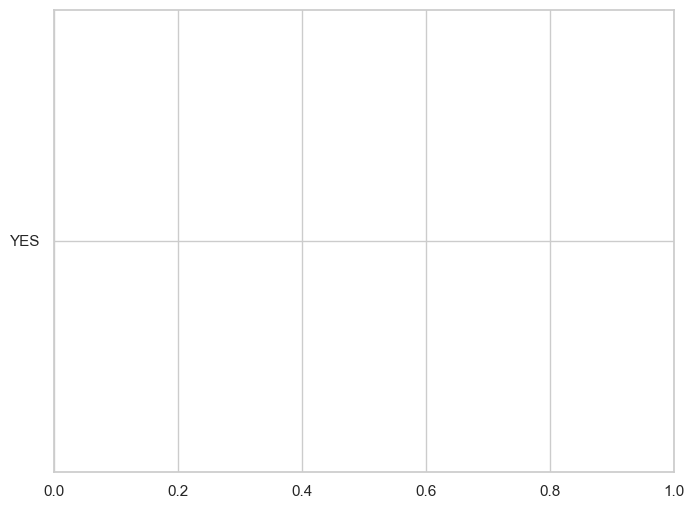

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/Users/ankith/Downloads/db.csv")

# Check for null data
print(data.isnull().sum())

# Features and target
features = data[["FS", "FU"]]
target = data["Diabetes"]

# Handle the data
cfeatures = pd.get_dummies(features, drop_first=True)

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(cfeatures, target, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(x_train, y_train)

# Performance
cr = classification_report(y_test, model.predict(x_test))
print(cr)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['FS'], data['FU'], c=target, cmap='viridis', alpha=0.5)
plt.colorbar(label='Diabetes (0: No, 1: Yes)')
plt.xlabel('Testing Sugar Levels')
plt.ylabel('Frequency of Urination')
plt.title('Scatter Plot of Testing Sugar Levels vs. Frequency of Urination')
plt.show()


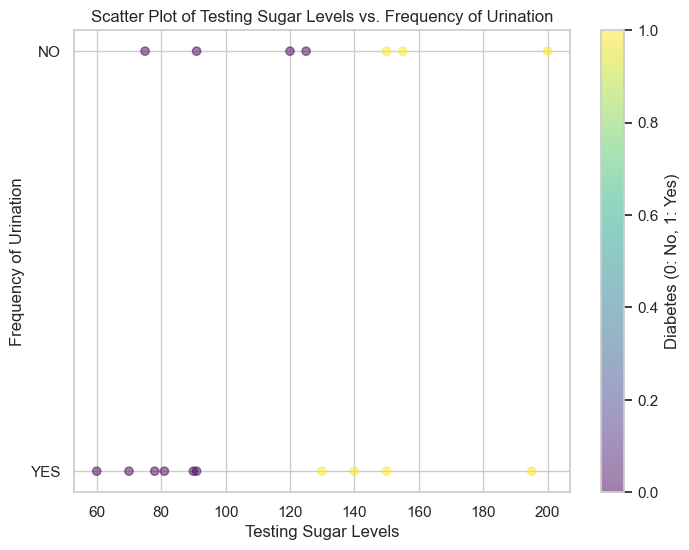

In [22]:
# Convert 'Diabetes' column to numerical values
target_numeric = target.map({'NO': 0, 'YES': 1})

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['FS'], data['FU'], c=target_numeric, cmap='viridis', alpha=0.5)
plt.colorbar(label='Diabetes (0: No, 1: Yes)')
plt.xlabel('Testing Sugar Levels')
plt.ylabel('Frequency of Urination')
plt.title('Scatter Plot of Testing Sugar Levels vs. Frequency of Urination')
plt.show()


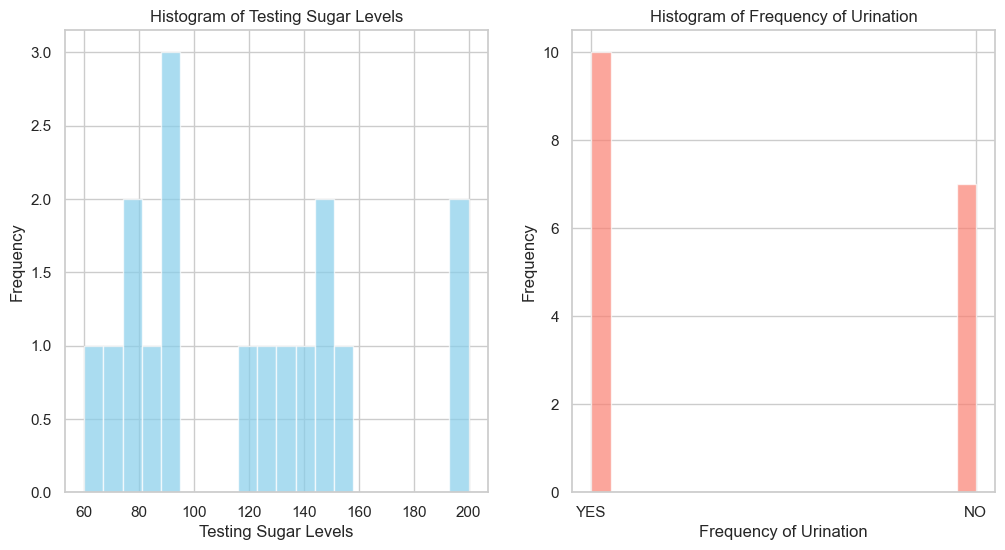

/var/folders/ln/0t3kfd6n7ynb2c8nh_zw28140000gp/T/ipykernel_6562/3308567047.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y='FS', data=data, palette='viridis')
/var/folders/ln/0t3kfd6n7ynb2c8nh_zw28140000gp/T/ipykernel_6562/3308567047.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y='FU', data=data, palette='viridis')


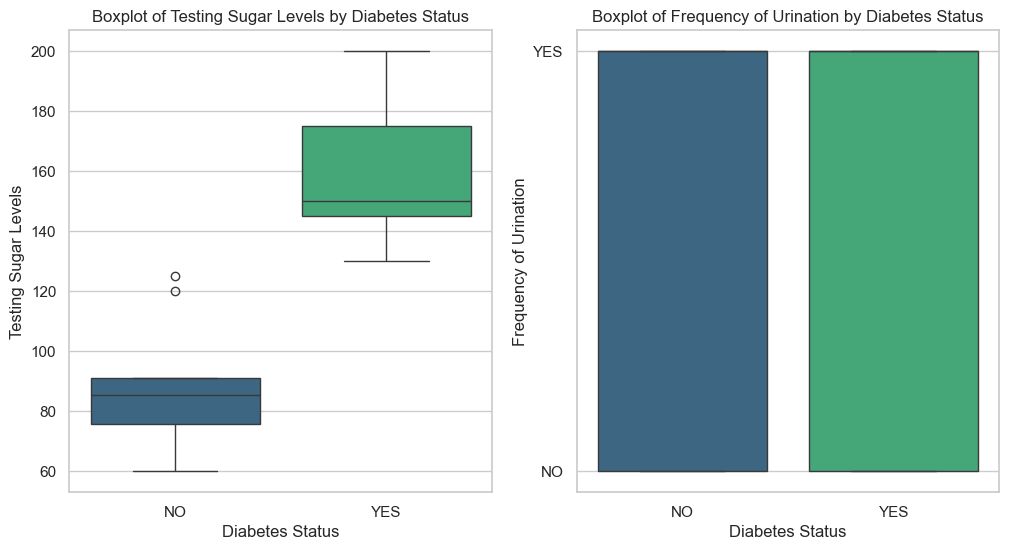

ValueError: could not convert string to float: 'YES'

<Figure size 800x600 with 0 Axes>

In [23]:
# Histograms of Input Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['FS'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Testing Sugar Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Testing Sugar Levels')

plt.subplot(1, 2, 2)
plt.hist(data['FU'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Frequency of Urination')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency of Urination')
plt.show()

# Boxplots of Input Features by Diabetes Status
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Diabetes', y='FS', data=data, palette='viridis')
plt.xlabel('Diabetes Status')
plt.ylabel('Testing Sugar Levels')
plt.title('Boxplot of Testing Sugar Levels by Diabetes Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Diabetes', y='FU', data=data, palette='viridis')
plt.xlabel('Diabetes Status')
plt.ylabel('Frequency of Urination')
plt.title('Boxplot of Frequency of Urination by Diabetes Status')
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bar Plot of Target Variable
plt.figure(figsize=(6, 4))
data['Diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Status')
plt.xticks(rotation=0)
plt.show()


In [24]:
# Convert 'Diabetes' column to numerical values
data['Diabetes'] = data['Diabetes'].map({'NO': 0, 'YES': 1})

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'YES'

<Figure size 800x600 with 0 Axes>